# Fake News Classifier


In [3]:
import pandas as pd

In [4]:
cd

C:\Users\Hashtag


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

In [ ]:
#independent features
X=df.drop('label',axis=1)

In [76]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [77]:
 #depending features
y=df['label']

In [78]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [79]:
df.shape

(20800, 5)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
df=df.dropna()
#removing incomplete data

In [82]:
df.shape

(18285, 5)

In [83]:
m=df.copy()

In [84]:
m.reset_index(inplace=True)
#some indices may have been removed cause of drop na 

In [85]:
#to remove stop words and special characters
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(m)):
    review=re.sub('[^a-z-A-Z]',' ',m['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [86]:
corpus


['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video - breitbart',
 'beno hamon win french socialist parti presidenti nomin - new york time',
 'back-channel plan ukrain russia courtesi trump associ - new york time',
 'obama organ action partner soros-link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fb

In [87]:
#applying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [88]:
X.shape


(18285, 5000)

In [89]:
#output feature
y=m['label']
y.shape

(18285,)

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [163]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [164]:
count_df=pd.DataFrame(X_train, columns=cv.get_feature_names())

In [165]:
count_df.head()

,aaron,abandon,abba,abbi,abbi martin,abbi martin expos,abc,abe,abedin,abedin email,...,york new york,york post,york time,young,youth,youtub,zika,zika viru,zone,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
import matplotlib.pyplot as plt


In [156]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalised confusion matrix")
    else:
        print("confusion matrix, without normalisation")
        
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')
        
        

## MultinomialNB Algorithm

In [166]:
from sklearn.naive_bayes import MultinomialNB

In [167]:
classifier=MultinomialNB()

In [168]:
from sklearn import metrics
import numpy as np
import itertools

confusion matrix, without normalisation
score= 0.9020122484689413


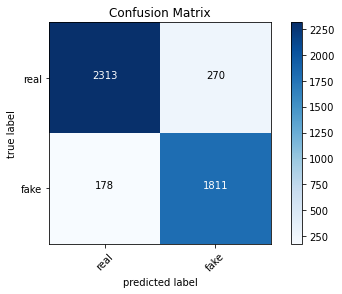

In [175]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(pred,y_test)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['real','fake'])
print('score=',score)


## Passive Agressive Classifier Algorithm 

In [2]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(pred,y_train)
print(score)


NameError: name 'X_train' is not defined

#

## Multinomial Classifier with Hyperparameter 

In [177]:
classifier=MultinomialNB(alpha=0.1)

In [182]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    classifier=sub_classifier
    print(alpha,'   ',score)

C:\Users\Hashtag\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.0     0.8919510061242345
0.1     0.9015748031496063
0.2     0.9017935258092739
0.30000000000000004     0.9024496937882764
0.4     0.9013560804899388
0.5     0.9002624671916011
0.6000000000000001     0.9004811898512686
0.7000000000000001     0.9006999125109362
0.8     0.9006999125109362
0.9     0.9011373578302713


In [181]:
#best accuracy obtained at alpha=0.30000000000000004 which is 0.9024496937882764